# 🧠 초급 딥러닝 실습 미션: MNIST 손글씨 숫자 인식기 직접 구현


### 🎯 학습 목표
- 신경망의 기본 구조 이해 (입력층-은닉층-출력층)
- NumPy 기반 행렬 내적 연산 이해
- 활성화 함수 (ReLU, sigmoid, softmax) 구현 능력 배양
- 사전 학습된 가중치를 사용한 추론 (inference) 수행
- MNIST 손글씨 숫자 데이터셋의 이해 및 시각화


## 문제 1. 활성화 함수 구현

In [2]:

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)
   

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c) #overflow방지 
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y


## 문제 2. 순전파 함수 구현

다음은 입력값 x에 대해 각 레이어에서 수행할 순전파(forward propagation) 연산입니다.
다층 퍼셉트론(MLP) 모델로, 총 3개의 레이어를 구성합니다.

In [3]:

def forward(x, weights):
    W1, b1 = weights['W1'], weights['b1']
    W2, b2 = weights['W2'], weights['b2']
    W3, b3 = weights['W3'], weights['b3']
    
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    
    z3 = np.dot(a2, W3) + b3
    y = softmax(z3)
    
    return y


## 문제 3. 학습된 가중치 불러오기

In [7]:

# weights.npz 파일이 있는 경로에 맞춰 조정 필요
weights_npz = np.load('/Users/jiyeonpark/Downloads/weights.npz')
print(weights_npz.files) # 확인 

weights = {
    'W1' : weights_npz['W1'],
    'b1' : weights_npz['b1'],
    'W2' : weights_npz['W2'],
    'b2' : weights_npz['b2'],
    'W3' : weights_npz['W3'],
    'b3' : weights_npz['b3'],   
}

['W1', 'b1', 'W2', 'b2', 'W3', 'b3']


## 문제 4. 테스트 데이터셋 불러오기 및 전처리

MNIST 테스트 데이터셋을 불러오고, 각 이미지를 (784,) 벡터로 정규화하세요.
이미지 10장을 선택하여 예측 결과를 시각화하세요 (matplotlib 사용).

X=[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y=['5' '0' '4' ... '4' '5' '6']
X_train=[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


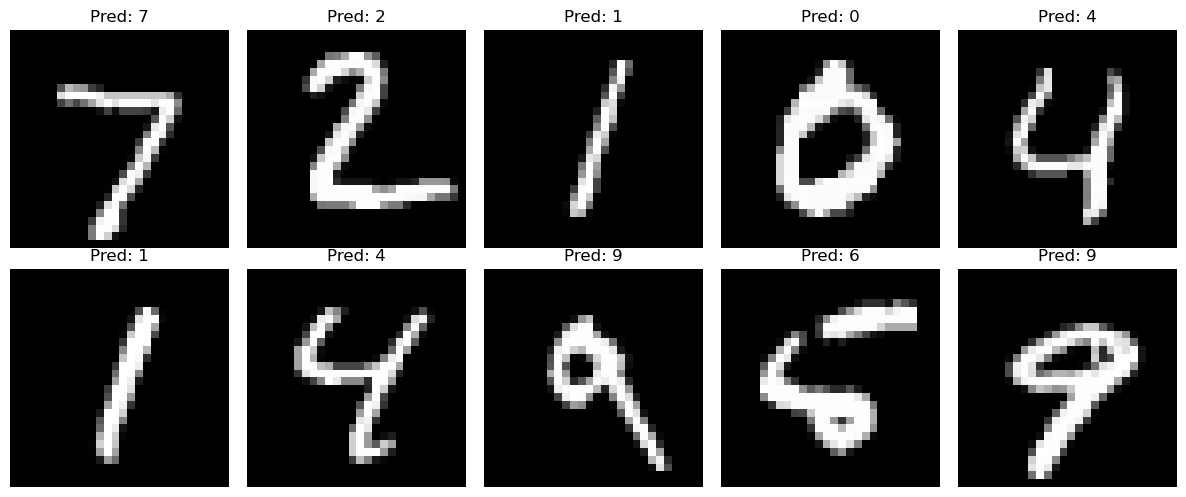

In [8]:

from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist.data, mnist.target
print(f"X={X}")
print(f"y={y}")
y = y.astype(np.uint8)

# 훈련/테스트 데이터 분리 및 정규화
X_train, X_test = X[:60000] / 255.0, X[60000:] / 255.0
y_train, y_test = y[:60000], y[60000:]

print(f"X_train={X_train}")


#10개 이미지 선택
num_images = 10
selected_images = X_test[:num_images] # (10, 784)
selected_labels = y_test[:num_images]

# 예측
outputs = []
for img in selected_images:
    out = forward(img, weights)
    pred = np.argmax(out)  # 가장 높은 점수 = 예측된 숫자 / 가장 큰 값을 가진 요소의 인덱스를 반환.
    #즉, 가장 높은 확률인 것을 뽑는 것 
    outputs.append(pred)

# 8. 시각화
plt.figure(figsize=(12, 5))
for i in range(num_images):
    plt.subplot(2, 5, i+1) #2행 5열 
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {outputs[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 개념정리
**👉 mnist = fetch_openml('mnist_784', as_frame = False)**
- fetch_openml() : 사이킷런에서 데이터 셋을 다운로드 하는 함수 
- mnist_784 : OpenML에 등록된 MNIST 손글씨 숫자 데이터셋 이름
- as_frame = False: 데이터를 판다스 df가 아닌 넘파이 배열로 가져오겠다! 
- mnist는 data와 target이라는 속성을 가진 객체가 된다! 

## 문제 5. 예측 실행 및 정확도 계산

In [9]:

preds = []
for x in X_test[:100]:
    y = forward(x, weights)
    pred = np.argmax(y)
    preds.append(pred)

acc = np.mean(np.array(preds) == y_test[:100])
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.98


## 🎁 보너스 문제: 다른 활성화 함수 비교

In [20]:

def forward_with_sigmoid(x, weights):
    W1, b1 = weights['W1'], weights['b1']
    W2, b2 = weights['W2'], weights['b2']
    W3, b3 = weights['W3'], weights['b3']
    
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    z3 = np.dot(a2, W3) + b3
    y = softmax(z3)
    
    return y

preds_sigmoid = []
for x in X_test[:100]:
    y = forward_with_sigmoid(x, weights)
    pred = np.argmax(y)
    preds_sigmoid.append(pred)

acc_sigmoid = np.mean(np.array(preds_sigmoid) == y_test[:100])
print(f"[Sigmoid 사용] Accuracy: {acc_sigmoid:.2f}")


[Sigmoid 사용] Accuracy: 0.17
